# Figures in meta-paper.

This notebook produce the maps in in Fig. 1 in the meta paper$^1$. This is to give yet one more example of the use of the agrid code. 

---
1. At least similar figures, the actual paper is generated by a SCons script. This notebook might not be updated. 

In [ ]:
%gui qt

In [1]:
import sys
sys.path.append('..')

from agrid.agrid import *
ant = Grid(crs=3031, res = [10*km, 10*km], left = -3100*km, up=3100*km, right = 3100*km, down = -3100*km)

In [15]:
from agrid.acc import download
bedmap_url = 'https://secure.antarctica.ac.uk/data/bedmap2/bedmap2_tiff.zip'
bedmap_zip_file = '../local/bedmap2_tiff.zip'
download(bedmap_url, bedmap_zip_file)

GSFC_url = 'http://quantarctica.tpac.org.au/Quantarctica3/Glaciology/GSFC%20Drainage/GSFC_DrainageSystems.shp'
GSFC_file = '../local/GSFC_DrainageSystems.shp'
download(GSFC_url, GSFC_file)

File ../local/bedmap2_tiff.zip already exists.
Saved:  ../local/bedmap2_tiff.zip
File ../local/GSFC_DrainageSystems.shp already exists.
Saved:  ../local/GSFC_DrainageSystems.shp


{}

In [16]:
no_data = 32767.
for data_set, label in zip(['thickness', 'bed'], ['ICE', 'DEM']):
    ant.ds[label] = (('Y', 'X'), 
                ant.read_raster('../../../data/Bedmap/bedmap2_tiff/bedmap2_%s.tif' %data_set, 
                                no_data = 32767.) )

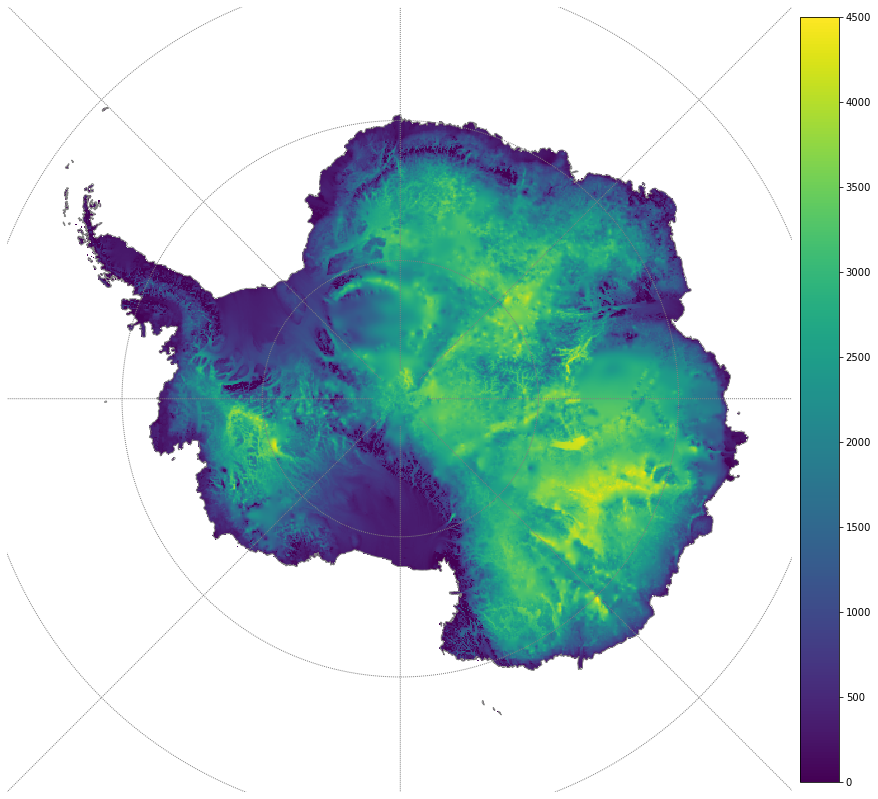

In [17]:
ant.map_grid('ICE', vmin=0, vmax=4500, cmap='viridis', cbar=True)

For this vector set, the attribute value is not a number but a string. `map_to_int` assigns a numerical value to each class. `return_map` returns dictionary of values. 

In [18]:
drainage, int_map = ant.assign_shape('../local/data/GSFC_DrainageSystems.shp', 
                                                 'ID', map_to_int = True, return_map = True)
ant.ds['DRAINAGE'] = (('Y', 'X'), drainage)

{'10f': 1, '10g': 2, '11f': 3, '11g': 4, '12f': 5, '12g': 6, '13f': 7, '13g': 8, '14f': 9, '14g': 10, '15f': 11, '15g': 12, '16f': 13, '16g': 14, '17f': 15, '17g': 16, '18f': 17, '18g': 18, '19f': 19, '19g': 20, '1f': 21, '1g': 22, '20f': 23, '20g': 24, '21f': 25, '21g': 26, '22f': 27, '22g': 28, '23f': 29, '23g': 30, '24f': 31, '24g': 32, '25f': 33, '25g': 34, '26f': 35, '26g': 36, '27f': 37, '27g': 38, '2f': 39, '2g': 40, '3f': 41, '3g': 42, '4f': 43, '4g': 44, '5f': 45, '5g': 46, '6f': 47, '6g': 48, '7f': 49, '7g': 50, '8g': 51, '9f': 52, '9g': 53}


In [ ]:
ant.ds['DRAINAGE'] = (('Y', 'X'), drainage)
ant.ds['DRAINAGE'] = ant.ds['DRAINAGE']#.where(ant.ds['DRAINAGE']>40, ant.ds['DRAINAGE']*15)

ant.map_grid(ant.ds['DRAINAGE'], cmap='RdBu')

We can select a few polygons to use as classifier: 

In [ ]:
polygons = list(range(0, 53//2))#[int_map[str(x) + 'g'] for x in range(40,53)]

In [ ]:
ant.ds['EAST_ICE'] = ant.ds['ICE']*ant.ds['DRAINAGE'].isin(polygons)
ant.map_grid('EAST_ICE', cmap='viridis')

We can do some calculations: 

In [ ]:
print(int(ant.ds['EAST_ICE'].sum()*np.prod(ant.res)/km**3),'km3')

In [ ]:
ant.ds['DEM'] = (('Y', 'X'), 
                ant.read_raster('../../../data/Bedmap/bedmap2_tiff/bedmap2_bed.tif', no_data = 32767.) )

In [ ]:
ant.oblique_view('DEM', 
    save_name = 'oblique.png',
    vmin= -2000, vmax=4000, 
    cmap='bone',
    distance=1300,
    azimuth=180,
    roll=-90)

! open oblique.png

In [ ]:
ant.ds['RANDOM'] = (('Y', 'X', 'Z'), 
                np.random.rand(*ant.shape3))

ant.ds['RANDOM'] = ant.ds['RANDOM'].where(ant.ds['DRAINAGE']>0).rolling(X=40, 
                                                    center=True).mean().rolling(Y=40, 
                                                    center=True).mean()

In [ ]:
plt.imshow(ant.ds['RANDOM'][:,:,4])

In [ ]:
import numpy
from mayavi.mlab import *

def test_volume_slice(data):

    sx = 1
    sy = 1
    sz = 100
    
    obj = volume_slice(data.values, plane_orientation='y_axes')
    
    obj.actor.actor.scale = (0.1, 1.0, 1.0)
    return obj


test_volume_slice(ant.ds['RANDOM'])

In [ ]:
import numpy
from mayavi.mlab import *

def test_volume_slice():
    x, y, z = np.ogrid[-5:5:64j, -5:5:64j, -5:5:64j]

    scalars = x * x * 0.5 + y * y + z * z * 2.0

    obj = volume_slice(scalars, plane_orientation='x_axes')
    return obj
test_volume_slice()

In [ ]:
#Download datasets
from agrid.acc import download
bedmap_url = 'https://secure.antarctica.ac.uk/data/bedmap2/bedmap2_tiff.zip'
bedmap_path = '../local/bedmap2_tiff'
download(bedmap_url, bedmap_path + '.zip')

GSFC_url = 'http://quantarctica.tpac.org.au/Quantarctica3/Glaciology/GSFC%20Drainage/GSFC_DrainageSystems.shp'
GSFC_file = '../local/GSFC_DrainageSystems.shp'
download(GSFC_url, GSFC_file)

In [ ]:
for data_set, label in zip(['thickness', 'bed'], ['ICE', 'DEM']):
    ant.ds[label] = (('Y', 'X'), 
                ant.read_raster('%s/bedmap2_%s.tif' %(bedmap_path, data_set), 
                                no_data = 32767.) )

In [14]:
#Download datasets
from agrid.acc import download
bedmap_url = 'https://secure.antarctica.ac.uk/data/bedmap2/bedmap2_tiff.zip'
bedmap_path = '../local/bedmap2_tiff'
download(bedmap_url, bedmap_path + '.zip')

GSFC_url = 'http://quantarctica.tpac.org.au/Quantarctica3/Glaciology/GSFC%20Drainage/GSFC_DrainageSystems.shp'
GSFC_file = '../local/GSFC_DrainageSystems'
for shape_acc in ['.shx', '.shp', '.prj', '.dbf', '.qix']:
    download(GSFC_url, GSFC_file + shape_acc)

# Import raster files
for data_set, label in zip(['thickness', 'bed'], ['ICE', 'DEM']):
	ant.ds[label] = (('Y', 'X'), 
		ant.read_raster('%s/bedmap2_%s.tif' %(bedmap_path, data_set), 
			no_data = 32767.) )

#Import polygons
drainage = ant.assign_shape(GSFC_file + '.shp','ID')
ant.ds['DRAINAGE'] = (('Y', 'X'), drainage)

# Select a few polygons: 
ant.ds['SEL_ICE'] = ant.ds['ICE']*ant.ds['DRAINAGE'].isin(list(range(0, 53//2)))

#Make maps
ant.map_grid('DRAINAGE', 
	cmap='Spectral', 
	save_name= 'selected.pdf')

ant.map_grid('SEL_ICE', 
	cmap = 'viridis', 
	save_name = 'selected.pdf')

# ADD SUBFIG C

ant.oblique_view('DEM', 
	vmin= 0, vmax = 4200, 
	cmap = 'bone',
	azimuth = 180, roll = -90,
	save_name = 'oblique_view.pdf')

#Analyse. E.g:
vol = int(ant.ds['SEL_ICE'].sum()*np.prod(ant.res)/km**3)

File ../local/bedmap2_tiff.zip already exists.


  3%|▎         | 1.02k/32.3k [00:00<00:03, 10.2kKB/s]

Saved:  ../local/bedmap2_tiff.zip
File ../local/GSFC_DrainageSystems.shx already exists.
Saved:  ../local/GSFC_DrainageSystems.shx
File ../local/GSFC_DrainageSystems.shp already exists.
Saved:  ../local/GSFC_DrainageSystems.shp
Downloading: ../local/GSFC_DrainageSystems.prj


32.3kKB [00:01, 20.9kKB/s]                           
  3%|▎         | 1.04k/32.3k [00:00<00:03, 10.4kKB/s]

Saved:  ../local/GSFC_DrainageSystems.prj
Downloading: ../local/GSFC_DrainageSystems.dbf


32.3kKB [00:01, 20.1kKB/s]                           
  4%|▍         | 1.27k/32.3k [00:00<00:02, 12.7kKB/s]

Saved:  ../local/GSFC_DrainageSystems.dbf
Downloading: ../local/GSFC_DrainageSystems.qix


32.3kKB [00:01, 20.2kKB/s]                           


Saved:  ../local/GSFC_DrainageSystems.qix


DriverError: Invalid offset for entity 2

In [ ]:
drainage

In [ ]:
drainage, kuk = ant.assign_shape('../local/data/GSFC_DrainageSystems.shp', 
                                 'ID', map_to_int = True, return_map = True)

In [ ]:
drainage